In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
import nltk
nltk.download('stopwords')

# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12


article_files = glob.glob('article.txt')
d = list()
for article in article_files:
    with open(article, encoding='utf-8') as f:
        filename = os.path.basename(article.split('.')[0])
        lines = (line.rstrip() for line in f) # All lines including the blank ones
        lines = list(line for line in lines if line) # Non-blank lines
        d.append(pd.DataFrame({'article': "article", 'paragraph': lines}))
doc = pd.concat(d)
doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,article,paragraph
0,article,Eliud Kipchoge makes history by running sub tw...
1,article,It was the marathon that turned into a sprint....
2,article,Eliud Kipchoge had brushed aside his pacemaker...
3,article,It was already known that Kipchoge is an extra...
4,article,"“I felt a lot of pressure yesterday,” Kipchoge..."
5,article,Kipchoge described the period between a 4.50am...
6,article,Giddy comparisons to other sporting and histor...
7,article,This was an operation afforded military levels...
8,article,"Ineos, a petrochemical company not exempt from..."
9,article,Ratcliffe was afforded the kind of canned laug...


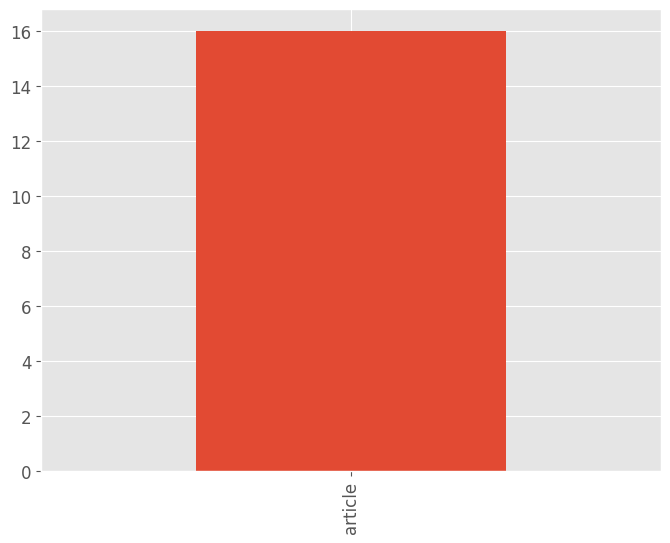

In [ ]:
doc['article'].value_counts().plot.bar();

In [ ]:
from nltk.corpus import stopwords

In [ ]:
doc['sentences'] = doc.paragraph.str.rstrip('.').str.split('[\.]\s+')
doc['words'] = doc.paragraph.str.strip().str.split('[\W_]+')

#This line is used to remove the English stop words
stop = stopwords.words('english')
doc['words'] = doc['words'].apply(lambda x: [item for item in x if item not in stop])
doc

,article,paragraph,sentences,words
0,article,Eliud Kipchoge makes history by running sub tw...,[Eliud Kipchoge makes history by running sub t...,"[Eliud, Kipchoge, makes, history, running, sub..."
1,article,It was the marathon that turned into a sprint....,[It was the marathon that turned into a sprint...,"[It, marathon, turned, sprint, Even, strongest..."
2,article,Eliud Kipchoge had brushed aside his pacemaker...,[Eliud Kipchoge had brushed aside his pacemake...,"[Eliud, Kipchoge, brushed, aside, pacemakers, ..."
3,article,It was already known that Kipchoge is an extra...,[It was already known that Kipchoge is an extr...,"[It, already, known, Kipchoge, extraordinary, ..."
4,article,"“I felt a lot of pressure yesterday,” Kipchoge...","[“I felt a lot of pressure yesterday,” Kipchog...","[, I, felt, lot, pressure, yesterday, Kipchoge..."
5,article,Kipchoge described the period between a 4.50am...,[Kipchoge described the period between a 4.50a...,"[Kipchoge, described, period, 4, 50am, wake, c..."
6,article,Giddy comparisons to other sporting and histor...,[Giddy comparisons to other sporting and histo...,"[Giddy, comparisons, sporting, historical, act..."
7,article,This was an operation afforded military levels...,[This was an operation afforded military level...,"[This, operation, afforded, military, levels, ..."
8,article,"Ineos, a petrochemical company not exempt from...","[Ineos, a petrochemical company not exempt fro...","[Ineos, petrochemical, company, exempt, bad, p..."
9,article,Ratcliffe was afforded the kind of canned laug...,[Ratcliffe was afforded the kind of canned lau...,"[Ratcliffe, afforded, kind, canned, laughter, ..."


In [ ]:
rows = list()
for row in doc[['paragraph', 'sentences']].iterrows():
    r = row[1]
    for sentence in r.sentences:
        rows.append((r.paragraph, sentence))

sentences = pd.DataFrame(rows, columns=['paragraph', 'sentences'])
#sentences = sentences[sentences.sentences.str.len() > 0]
sentences.head()

,paragraph,sentences
0,Eliud Kipchoge makes history by running sub tw...,Eliud Kipchoge makes history by running sub tw...
1,It was the marathon that turned into a sprint....,It was the marathon that turned into a sprint
2,It was the marathon that turned into a sprint....,Even the strongest cynics – and they are not h...
3,Eliud Kipchoge had brushed aside his pacemaker...,Eliud Kipchoge had brushed aside his pacemakers
4,Eliud Kipchoge had brushed aside his pacemaker...,The Kenyan pointed to and waved at adoring gal...


In [ ]:
rows = list()
for row in doc[['paragraph', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.paragraph, word))

words = pd.DataFrame(rows, columns=['paragraph', 'words'])
#remove empty spaces and change words to lower case
words = words[words.words.str.len() > 0]
words['words'] = words.words.str.lower()
words.head()
#words

,paragraph,words
0,Eliud Kipchoge makes history by running sub tw...,eliud
1,Eliud Kipchoge makes history by running sub tw...,kipchoge
2,Eliud Kipchoge makes history by running sub tw...,makes
3,Eliud Kipchoge makes history by running sub tw...,history
4,Eliud Kipchoge makes history by running sub tw...,running


In [ ]:
rows = list()
for row in doc[['article', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.article, word))

wordcount = pd.DataFrame(rows, columns=['article', 'words'])
wordcount['words'] = wordcount.words.str.lower()
wordcount.words = wordcount.words.str.replace('\d+', '')
wordcount.words = wordcount.words.str.replace(r'^the', '')
wordcount = wordcount[wordcount.words.str.len() > 2]


counts = wordcount.groupby('article')\
    .words.value_counts()\
    .to_frame()\
    .rename(columns={'words':'n_w'})
#counts.head()
counts
# wordcount
#wordcount.words.tolist()
#counts.columns

<ipython-input-35-eb12fda023f6>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  wordcount.words = wordcount.words.str.replace('\d+', '')
<ipython-input-35-eb12fda023f6>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  wordcount.words = wordcount.words.str.replace(r'^the', '')


n_w
article words         
article kipchoge    15
        marathon     7
        man          4
        running      4
        said         4
...                ...
        wounded      1
        year         1
        years        1
        yesterday    1
        yet          1

[355 rows x 1 columns]

n_w
article words          
article kipchoge     15
        marathon      7
        man           4
        running       4
        said          4
        that          4
        clock         3
        four          3
        history       3
        morning       3
        one           3
        pacemakers    3
        point         3
        stretch       3
        this          3
        vienna        3
        when          3
        world         3
        afforded      2
        aside         2

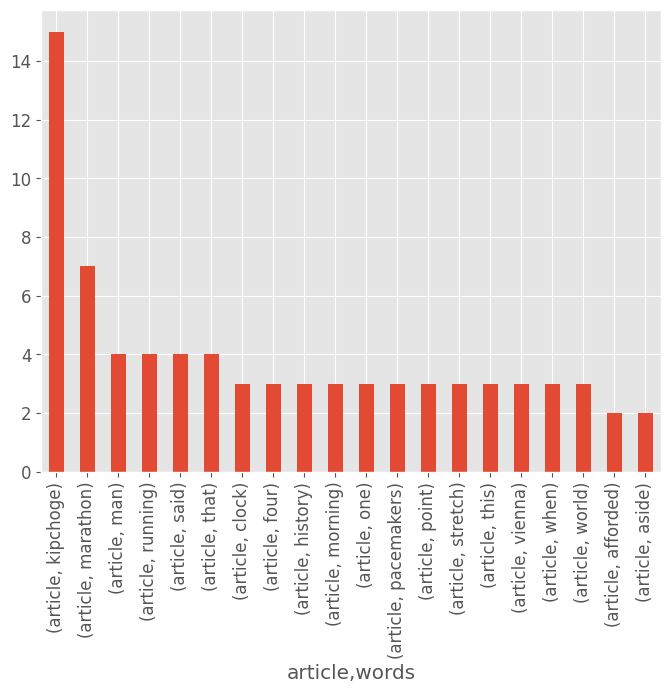

In [ ]:
def pretty_plot_top_n(series, top_n=20, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])

In [ ]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
article,
article,441


In [ ]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()
#tf

n_w  n_d        tf
article words                       
article kipchoge   15  441  0.034014
        marathon    7  441  0.015873
        man         4  441  0.009070
        running     4  441  0.009070
        said        4  441  0.009070

tf
article words               
article kipchoge    0.034014
        marathon    0.015873
        man         0.009070
        running     0.009070
        said        0.009070
        that        0.009070
        clock       0.006803
        four        0.006803
        history     0.006803
        morning     0.006803
        one         0.006803
        pacemakers  0.006803
        point       0.006803
        stretch     0.006803
        this        0.006803
        vienna      0.006803
        when        0.006803
        world       0.006803
        afforded    0.004535
        aside       0.004535

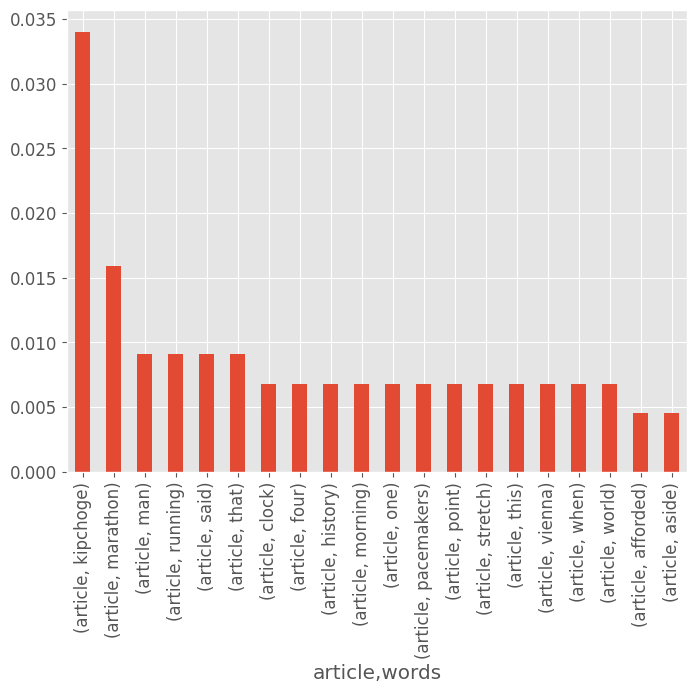

In [ ]:
pretty_plot_top_n(tf['tf'])

In [ ]:
c_d = wordcount.article.nunique()
c_d

1

In [ ]:
idf = wordcount.groupby('words')\
    .article\
    .nunique()\
    .to_frame()\
    .rename(columns={'article':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
words,
achieve,1
pursuit,1
publicity,1
public,1
prototype,1


In [ ]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()
#idf

,i_d,idf
words,,
achieve,1,0.0
pursuit,1,0.0
publicity,1,0.0
public,1,0.0
prototype,1,0.0


In [ ]:
tf_idf = tf.join(idf)

tf_idf.head()
#tf_idf

n_w  n_d        tf  i_d  idf
article words                                 
article kipchoge   15  441  0.034014    1  0.0
        marathon    7  441  0.015873    1  0.0
        man         4  441  0.009070    1  0.0
        running     4  441  0.009070    1  0.0
        said        4  441  0.009070    1  0.0

In [ ]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()
#tf_idf

n_w  n_d        tf  i_d  idf  tf_idf
article words                                         
article kipchoge   15  441  0.034014    1  0.0     0.0
        marathon    7  441  0.015873    1  0.0     0.0
        man         4  441  0.009070    1  0.0     0.0
        running     4  441  0.009070    1  0.0     0.0
        said        4  441  0.009070    1  0.0     0.0

In [ ]:
freq_matrix = pd.DataFrame(np.outer(tf_idf["tf"], tf_idf["tf"]), tf_idf["tf"].index, tf_idf["tf"].index)
#freq_matrix.head()
freq_matrix

article             article                                                    \
words              kipchoge  marathon       man   running      said      that   
article words                                                                   
article kipchoge   0.001157  0.000540  0.000309  0.000309  0.000309  0.000309   
        marathon   0.000540  0.000252  0.000144  0.000144  0.000144  0.000144   
        man        0.000309  0.000144  0.000082  0.000082  0.000082  0.000082   
        running    0.000309  0.000144  0.000082  0.000082  0.000082  0.000082   
        said       0.000309  0.000144  0.000082  0.000082  0.000082  0.000082   
...                     ...       ...       ...       ...       ...       ...   
        wounded    0.000077  0.000036  0.000021  0.000021  0.000021  0.000021   
        year       0.000077  0.000036  0.000021  0.000021  0.000021  0.000021   
        years      0.000077  0.000036  0.000021  0.000021  0.000021  0.000021   
        yesterday  0.000077  0.000036  0.000021  0.000021  0.000021  0.000021   
        yet        0.000077  0.000036  0.000021  0.000021  0.000021  0.000021   

article                                                    ...            \
words                 clock      four   history   morning  ...    widely   
article words                                              ...             
article kipchoge   0.000231  0.000231  0.000231  0.000231  ...  0.000077   
        marathon   0.000108  0.000108  0.000108  0.000108  ...  0.000036   
        man        0.000062  0.000062  0.000062  0.000062  ...  0.000021   
        running    0.000062  0.000062  0.000062  0.000062  ...  0.000021   
        said       0.000062  0.000062  0.000062  0.000062  ...  0.000021   
...                     ...       ...       ...       ...  ...       ...   
        wounded    0.000015  0.000015  0.000015  0.000015  ...  0.000005   
        year       0.000015  0.000015  0.000015  0.000015  ...  0.000005   
        years      0.000015  0.000015  0.000015  0.000015  ...  0.000005   
        yesterday  0.000015  0.000015  0.000015  0.000015  ...  0.000005   
        yet        0.000015  0.000015  0.000015  0.000015  ...  0.000005   

article                                                                        \
words                winner      with    within     would   wounded      year   
article words                                                                   
article kipchoge   0.000077  0.000077  0.000077  0.000077  0.000077  0.000077   
        marathon   0.000036  0.000036  0.000036  0.000036  0.000036  0.000036   
        man        0.000021  0.000021  0.000021  0.000021  0.000021  0.000021   
        running    0.000021  0.000021  0.000021  0.000021  0.000021  0.000021   
        said       0.000021  0.000021  0.000021  0.000021  0.000021  0.000021   
...                     ...       ...       ...       ...       ...       ...   
        wounded    0.000005  0.000005  0.000005  0.000005  0.000005  0.000005   
        year       0.000005  0.000005  0.000005  0.000005  0.000005  0.000005   
        years      0.000005  0.000005  0.000005  0.000005  0.000005  0.000005   
        yesterday  0.000005  0.000005  0.000005  0.000005  0.000005  0.000005   
        yet        0.000005  0.000005  0.000005  0.000005  0.000005  0.000005   

article                                          
words                 years yesterday       yet  
article words                                    
article kipchoge   0.000077  0.000077  0.000077  
        marathon   0.000036  0.000036  0.000036  
        man        0.000021  0.000021  0.000021  
        running    0.000021  0.000021  0.000021  
        said       0.000021  0.000021  0.000021  
...                     ...       ...       ...  
        wounded    0.000005  0.000005  0.000005  
        year       0.000005  0.000005  0.000005  
        years      0.000005  0.000005  0.000005  
        yesterday  0.000005  0.000005  0.000005  
        yet    

In [ ]:
vector_max = tf_idf['tf'].max()
print(vector_max)
matrix_max = freq_matrix.max().max()
print(matrix_max)

0.034013605442176874
0.0011569253551760843


In [ ]:
tf_idf['norm_freq'] = tf_idf.tf / vector_max

temp_df = tf_idf[['tf', 'norm_freq']]
#temp_df
temp_df.head(20)

#tf_idf.head()
#tf_idf

tf  norm_freq
article words                          
article kipchoge    0.034014   1.000000
        marathon    0.015873   0.466667
        man         0.009070   0.266667
        running     0.009070   0.266667
        said        0.009070   0.266667
        that        0.009070   0.266667
        clock       0.006803   0.200000
        four        0.006803   0.200000
        history     0.006803   0.200000
        morning     0.006803   0.200000
        one         0.006803   0.200000
        pacemakers  0.006803   0.200000
        point       0.006803   0.200000
        stretch     0.006803   0.200000
        this        0.006803   0.200000
        vienna      0.006803   0.200000
        when        0.006803   0.200000
        world       0.006803   0.200000
        afforded    0.004535   0.133333
        aside       0.004535   0.133333

In [ ]:
freq_matrix_norm = freq_matrix.div(matrix_max)
freq_matrix_norm

article             article                                                    \
words              kipchoge  marathon       man   running      said      that   
article words                                                                   
article kipchoge   1.000000  0.466667  0.266667  0.266667  0.266667  0.266667   
        marathon   0.466667  0.217778  0.124444  0.124444  0.124444  0.124444   
        man        0.266667  0.124444  0.071111  0.071111  0.071111  0.071111   
        running    0.266667  0.124444  0.071111  0.071111  0.071111  0.071111   
        said       0.266667  0.124444  0.071111  0.071111  0.071111  0.071111   
...                     ...       ...       ...       ...       ...       ...   
        wounded    0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   
        year       0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   
        years      0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   
        yesterday  0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   
        yet        0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   

article                                                    ...            \
words                 clock      four   history   morning  ...    widely   
article words                                              ...             
article kipchoge   0.200000  0.200000  0.200000  0.200000  ...  0.066667   
        marathon   0.093333  0.093333  0.093333  0.093333  ...  0.031111   
        man        0.053333  0.053333  0.053333  0.053333  ...  0.017778   
        running    0.053333  0.053333  0.053333  0.053333  ...  0.017778   
        said       0.053333  0.053333  0.053333  0.053333  ...  0.017778   
...                     ...       ...       ...       ...  ...       ...   
        wounded    0.013333  0.013333  0.013333  0.013333  ...  0.004444   
        year       0.013333  0.013333  0.013333  0.013333  ...  0.004444   
        years      0.013333  0.013333  0.013333  0.013333  ...  0.004444   
        yesterday  0.013333  0.013333  0.013333  0.013333  ...  0.004444   
        yet        0.013333  0.013333  0.013333  0.013333  ...  0.004444   

article                                                                        \
words                winner      with    within     would   wounded      year   
article words                                                                   
article kipchoge   0.066667  0.066667  0.066667  0.066667  0.066667  0.066667   
        marathon   0.031111  0.031111  0.031111  0.031111  0.031111  0.031111   
        man        0.017778  0.017778  0.017778  0.017778  0.017778  0.017778   
        running    0.017778  0.017778  0.017778  0.017778  0.017778  0.017778   
        said       0.017778  0.017778  0.017778  0.017778  0.017778  0.017778   
...                     ...       ...       ...       ...       ...       ...   
        wounded    0.004444  0.004444  0.004444  0.004444  0.004444  0.004444   
        year       0.004444  0.004444  0.004444  0.004444  0.004444  0.004444   
        years      0.004444  0.004444  0.004444  0.004444  0.004444  0.004444   
        yesterday  0.004444  0.004444  0.004444  0.004444  0.004444  0.004444   
        yet        0.004444  0.004444  0.004444  0.004444  0.004444  0.004444   

article                                          
words                 years yesterday       yet  
article words                                    
article kipchoge   0.066667  0.066667  0.066667  
        marathon   0.031111  0.031111  0.031111  
        man        0.017778  0.017778  0.017778  
        running    0.017778  0.017778  0.017778  
        said       0.017778  0.017778  0.017778  
...                     ...       ...       ...  
        wounded    0.004444  0.004444  0.004444  
        year       0.004444  0.004444  0.004444  
        years      0.004444  0.004444  0.004444  
        yesterday  0.004444  0.004444  0.004444  
        yet    

In [ ]:
np.fill_diagonal(freq_matrix_norm.values, 0)
freq_matrix_norm

article             article                                                    \
words              kipchoge  marathon       man   running      said      that   
article words                                                                   
article kipchoge   0.000000  0.466667  0.266667  0.266667  0.266667  0.266667   
        marathon   0.466667  0.000000  0.124444  0.124444  0.124444  0.124444   
        man        0.266667  0.124444  0.000000  0.071111  0.071111  0.071111   
        running    0.266667  0.124444  0.071111  0.000000  0.071111  0.071111   
        said       0.266667  0.124444  0.071111  0.071111  0.000000  0.071111   
...                     ...       ...       ...       ...       ...       ...   
        wounded    0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   
        year       0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   
        years      0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   
        yesterday  0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   
        yet        0.066667  0.031111  0.017778  0.017778  0.017778  0.017778   

article                                                    ...            \
words                 clock      four   history   morning  ...    widely   
article words                                              ...             
article kipchoge   0.200000  0.200000  0.200000  0.200000  ...  0.066667   
        marathon   0.093333  0.093333  0.093333  0.093333  ...  0.031111   
        man        0.053333  0.053333  0.053333  0.053333  ...  0.017778   
        running    0.053333  0.053333  0.053333  0.053333  ...  0.017778   
        said       0.053333  0.053333  0.053333  0.053333  ...  0.017778   
...                     ...       ...       ...       ...  ...       ...   
        wounded    0.013333  0.013333  0.013333  0.013333  ...  0.004444   
        year       0.013333  0.013333  0.013333  0.013333  ...  0.004444   
        years      0.013333  0.013333  0.013333  0.013333  ...  0.004444   
        yesterday  0.013333  0.013333  0.013333  0.013333  ...  0.004444   
        yet        0.013333  0.013333  0.013333  0.013333  ...  0.004444   

article                                                                        \
words                winner      with    within     would   wounded      year   
article words                                                                   
article kipchoge   0.066667  0.066667  0.066667  0.066667  0.066667  0.066667   
        marathon   0.031111  0.031111  0.031111  0.031111  0.031111  0.031111   
        man        0.017778  0.017778  0.017778  0.017778  0.017778  0.017778   
        running    0.017778  0.017778  0.017778  0.017778  0.017778  0.017778   
        said       0.017778  0.017778  0.017778  0.017778  0.017778  0.017778   
...                     ...       ...       ...       ...       ...       ...   
        wounded    0.004444  0.004444  0.004444  0.004444  0.000000  0.004444   
        year       0.004444  0.004444  0.004444  0.004444  0.004444  0.000000   
        years      0.004444  0.004444  0.004444  0.004444  0.004444  0.004444   
        yesterday  0.004444  0.004444  0.004444  0.004444  0.004444  0.004444   
        yet        0.004444  0.004444  0.004444  0.004444  0.004444  0.004444   

article                                          
words                 years yesterday       yet  
article words                                    
article kipchoge   0.066667  0.066667  0.066667  
        marathon   0.031111  0.031111  0.031111  
        man        0.017778  0.017778  0.017778  
        running    0.017778  0.017778  0.017778  
        said       0.017778  0.017778  0.017778  
...                     ...       ...       ...  
        wounded    0.004444  0.004444  0.004444  
        year       0.004444  0.004444  0.004444  
        years      0.000000  0.004444  0.004444  
        yesterday  0.004444  0.000000  0.004444  
        yet    

In [ ]:
#define sigmoid function
#currently just a placeholder because tanh activation function is selected instead
def sigmoid(x):
    beta = 1
    return 1 / (1 + np.exp(-x * beta))


tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["norm_freq"])
temp = np.tanh(freq_matrix_norm @ tf_idf["hopfield_value"])
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
temp = np.tanh(freq_matrix_norm @ temp)
#temp
#temp
#temp.head()
temp.head(20)

article  words     
article  kipchoge      1.000000
         marathon      1.000000
         man           0.999999
         running       0.999999
         said          0.999999
         that          0.999999
         clock         0.999976
         four          0.999976
         history       0.999976
         morning       0.999976
         one           0.999976
         pacemakers    0.999976
         point         0.999976
         stretch       0.999976
         this          0.999976
         vienna        0.999976
         when          0.999976
         world         0.999976
         afforded      0.998961
         aside         0.998961
dtype: float64

Hopfield Loop exited at Iteration 23


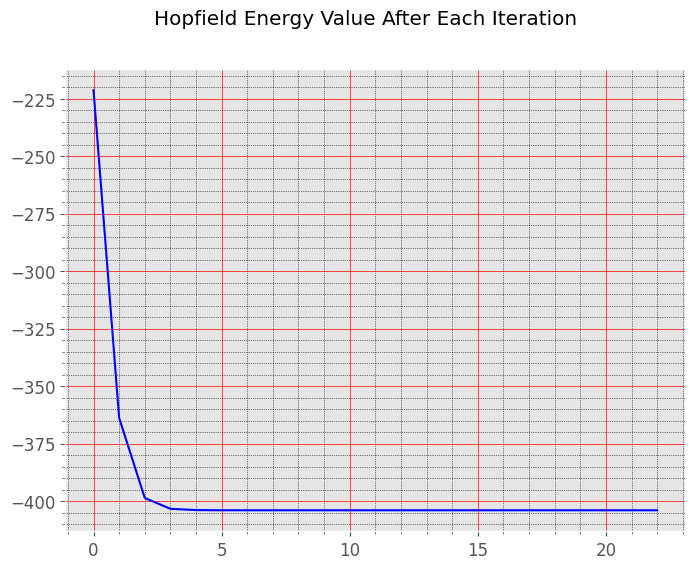

In [ ]:
#safe limit
itr = 0
zero_itr = 0
max_itr = 5    #maximum iteration where Delta Energy is 0
char_list = []
delta_energy = 0
threshold = 0
energy = 0
init_energy = 0

tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["norm_freq"])

while (delta_energy < 0.0001):
    itr = itr + 1
    #Calculation of output vector from Hopfield Network
    #y = activation_function(sum(W * x))
    tf_idf["hopfield_value"] = np.tanh(freq_matrix_norm @ tf_idf["hopfield_value"])

    #Calculation of Hopfield Energy Function and its Delta
    #E = [-1/2 * sum(Wij * xi * xj)] + [sum(threshold*xi)]
    energy = (-0.5 * tf_idf["hopfield_value"] @ freq_matrix_norm @ tf_idf["hopfield_value"]) \
              + (np.sum(threshold * tf_idf["hopfield_value"]))
    #Append to list for characterization
    char_list.append(energy)
    #Find Delta for Energy
    delta_energy = energy - init_energy
    #print ('Energy = {}'.format(energy))
    #print ('Init_Energy = {}'.format(init_energy))
    #print ('Delta_Energy = {}'.format(delta_energy))
    #print ()
    init_energy = energy     #Setting the current energy to be previous energy in next iteration

    #break the loop if Delta Energy reached zero after a certain iteration
    if (delta_energy == 0):
        zero_itr = zero_itr + 1
        if (zero_itr == max_itr):
            print("Hopfield Loop exited at Iteration {}".format(itr))
            break


big_grid = np.arange(0,itr)
plt.plot(big_grid,char_list, color ='blue')
plt.suptitle('Hopfield Energy Value After Each Iteration')
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.rcParams['figure.figsize'] = [13, 6]
plt.show()
#tf_idf.head()
#tf_idf
#final_hopfield_output = tf_idf["hopfield_value"]

In [ ]:
final_output_vector = tf_idf["hopfield_value"]
final_output_vector.head(10)
#final_output_vector.head()
#final_output_vector
#tf_idf

article  words   
article  kipchoge    1.000000
         marathon    1.000000
         man         0.999999
         running     0.999999
         said        0.999999
         that        0.999999
         clock       0.999976
         four        0.999976
         history     0.999976
         morning     0.999976
Name: hopfield_value, dtype: float64

In [ ]:
txt_smr_sentences = pd.DataFrame({'sentences': sentences.sentences})
txt_smr_sentences['words'] = txt_smr_sentences.sentences.str.strip().str.split('[\W_]+')

rows = list()
for row in txt_smr_sentences[['sentences', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.sentences, word))

txt_smr_sentences = pd.DataFrame(rows, columns=['sentences', 'words'])
#remove empty spaces and change words to lower case
txt_smr_sentences['words'].replace('', np.nan, inplace=True)
txt_smr_sentences.dropna(subset=['words'], inplace=True)
txt_smr_sentences.reset_index(drop=True, inplace=True)
txt_smr_sentences['words'] = txt_smr_sentences.words.str.lower()

##Initialize 3 new columns
# w_ind = New word index
# s_strt = Starting index of a sentence
# s_stp = Stopping index of a sentence
# w_scr = Hopfield Value for words
txt_smr_sentences['w_ind'] = txt_smr_sentences.index + 1
txt_smr_sentences['s_strt'] = 0
txt_smr_sentences['s_stp'] = 0
txt_smr_sentences['w_scr'] = 0


#Iterate through the rows to check if the current sentence is equal to
#previous sentence.  If not equal, determine the "start" & "stop"
start = 0
stop = 0
prvs_string = ""
for i in txt_smr_sentences.index:
    #print (i)
    if (i == 0):
        start = 1
        txt_smr_sentences.iloc[i,3] = 1
        prvs_string = txt_smr_sentences.iloc[i,0]
    else:
        if (txt_smr_sentences.iloc[i,0] != prvs_string):
            stop = txt_smr_sentences.iloc[i-1,2]
            txt_smr_sentences.iloc[i-(stop-start)-1:i,4] = stop
            start = txt_smr_sentences.iloc[i,2]
            txt_smr_sentences.iloc[i,3] = start
            prvs_string = txt_smr_sentences.iloc[i,0]
        else:
            txt_smr_sentences.iloc[i,3] = start
    if (i == len(txt_smr_sentences.index)-1):
        last_ind = txt_smr_sentences.w_ind.max()
        txt_smr_sentences.iloc[i-(last_ind-start):i+1,4] = last_ind

#New Column for length of sentence
txt_smr_sentences['length'] = txt_smr_sentences['s_stp'] - txt_smr_sentences['s_strt'] + 1

#Rearrange the Columns
txt_smr_sentences = txt_smr_sentences[['sentences', 's_strt', 's_stp', 'length', 'words', 'w_ind', 'w_scr']]

txt_smr_sentences.head(100)
#txt_smr_sentences

,sentences,s_strt,s_stp,length,words,w_ind,w_scr
0,Eliud Kipchoge makes history by running sub tw...,1,10,10,eliud,1,0
1,Eliud Kipchoge makes history by running sub tw...,1,10,10,kipchoge,2,0
2,Eliud Kipchoge makes history by running sub tw...,1,10,10,makes,3,0
3,Eliud Kipchoge makes history by running sub tw...,1,10,10,history,4,0
4,Eliud Kipchoge makes history by running sub tw...,1,10,10,by,5,0
...,...,...,...,...,...,...,...
95,"“That was the best moment in my life,” said Ki...",88,104,17,said,96,0
96,"“That was the best moment in my life,” said Ki...",88,104,17,kipchoge,97,0
97,"“That was the best moment in my life,” said Ki...",88,104,17,of,98,0
98,"“That was the best moment in my life,” said Ki...",88,104,17,catching,99,0


In [ ]:
for index, value in final_output_vector.items():
    for i in txt_smr_sentences.index:
        if(index[1] == txt_smr_sentences.iloc[i,4]):
            txt_smr_sentences.iloc[i,6] = value

#New Column for placeholder of sentences score
txt_smr_sentences['s_scr'] = txt_smr_sentences.w_scr

txt_smr_sentences.head(100)

,sentences,s_strt,s_stp,length,words,w_ind,w_scr,s_scr
0,Eliud Kipchoge makes history by running sub tw...,1,10,10,eliud,1,0.998961,0.998961
1,Eliud Kipchoge makes history by running sub tw...,1,10,10,kipchoge,2,1.000000,1.000000
2,Eliud Kipchoge makes history by running sub tw...,1,10,10,makes,3,0.955824,0.955824
3,Eliud Kipchoge makes history by running sub tw...,1,10,10,history,4,0.999976,0.999976
4,Eliud Kipchoge makes history by running sub tw...,1,10,10,by,5,0.000000,0.000000
...,...,...,...,...,...,...,...,...
95,"“That was the best moment in my life,” said Ki...",88,104,17,said,96,0.999999,0.999999
96,"“That was the best moment in my life,” said Ki...",88,104,17,kipchoge,97,1.000000,1.000000
97,"“That was the best moment in my life,” said Ki...",88,104,17,of,98,0.000000,0.000000
98,"“That was the best moment in my life,” said Ki...",88,104,17,catching,99,0.955824,0.955824


In [ ]:
aggregation_functions = {'s_strt': 'first', \
                         's_stp': 'first', \
                         'length': 'first', \
                         's_scr': 'sum'}
tss_new = txt_smr_sentences.groupby(txt_smr_sentences['sentences']).aggregate(aggregation_functions)\
            .sort_values(by='s_scr', ascending=False).reset_index()
tss_new

,sentences,s_strt,s_stp,length,s_scr
0,Even the strongest cynics – and they are not h...,20,56,37,18.509862
1,He is not at all troubled by the fact the IAAF...,607,643,37,18.423588
2,With the clock stopped and a sporting world lo...,165,193,29,17.423565
3,When Kipchoge’s status as a Nike athlete - the...,538,570,33,17.336301
4,"In the inevitable, wide-ranging assessment of ...",116,142,27,15.598190
5,It is altogether fair to reference Roger Banni...,276,303,28,15.424652
6,"Dave Brailsford, seemingly unaffected by the c...",513,537,25,14.554087
7,Teams of seven pacemakers – in a phalanx forma...,363,393,31,14.469842
8,"Jim Ratcliffe, the company’s founder and riche...",477,497,21,13.599301
9,The Kenyan pointed to and waved at adoring gal...,64,87,24,13.468828


In [ ]:
import math

max_word = math.floor(0.1 * tss_new['s_stp'].max())
print("Max word amount for summary: {}\n".format(max_word))

summary = tss_new.loc[tss_new['s_strt'] == 1, 'sentences'].iloc[0] + ". " ##Consider the Title of the Article
length_printed = 0

for i in tss_new.index:
    if (length_printed <= max_word):
        summary +=  tss_new.iloc[i,0] + ". "
        length_printed += tss_new.iloc[i,3]  ##Consider the sentence where max_word appear in the middle
    else:
        break

print(summary)

Max word amount for summary: 83

Eliud Kipchoge makes history by running sub two-hour marathon. Even the strongest cynics – and they are not hard to come by – had to smile at the 500-metre final stretch that defined the making of history: the marathon distance has been completed in under two hours. He is not at all troubled by the fact the IAAF does not recognise this feat as a record, a scenario perhaps impacted by the detail that he holds the world’s best official marathon time anyway. With the clock stopped and a sporting world looking on with awe, the 34-year-old Kenyan displayed all the physical strain of having walked for the morning papers. 
